In [687]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [88]:
#warmUpExercise
A = np.eye(5)
print('Running warmUpExercise ... \n');
print('5x5 Identity Matrix: \n');
print(A)

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


[5, 25, -5, 25]

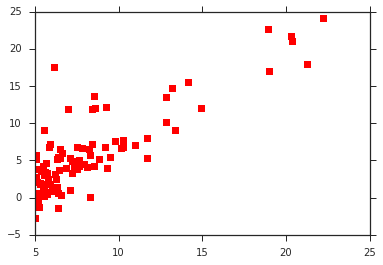

In [688]:
fname='ex1data1.txt';
#dtype = np.dtype([('X', 'f8'), ('y', 'f8')])
df = pd.read_csv(fname, header=None, names=['Population', 'Profit'])
data = np.loadtxt(fname, delimiter=',')
data=np.asmatrix(data)
X = data[:, 0]; 
y = data[:, 1];
m = np.size(X);
plt.plot(X, y,'rs');
plt.axis([5, 25, -5, 25])

In [695]:
df.head() 

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [694]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


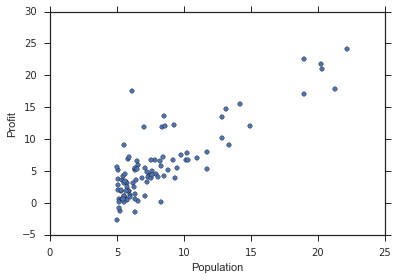

In [698]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(6,4)) 

In [428]:
def computeCost(X,y, theta):
    J=np.sum(np.square(X*theta-y))/(2*len(X));
    return J

In [229]:
    X = np.c_[np.ones(m), data[:,0]];
    theta = np.zeros((2,1))
    iterations = 1500;
    alpha = 0.01;
    m = X.shape[0];
    J_history = np.zeros(iterations);
    for iter in range(0,iterations):
        H=X*theta;
        theta0_temp = theta[0,0]-alpha*np.sum(H-y)/m;
        theta1_temp = theta[1,0]-alpha*np.sum(np.multiply((H-y),X[:,1]))/m;
        theta = np.transpose(np.asmatrix([theta0_temp, theta1_temp]))
        #theta = [theta0_temp, theta1_temp];
        J_history[iter] = computeCost(X, y, theta);

In [231]:
theta


matrix([[-3.63029144],
        [ 1.16636235]])

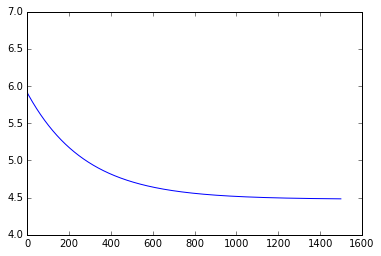

In [230]:
plt.plot(J_history,'-');

In [592]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2];
y = data[:, 2];
m = np.size(y);

In [255]:
print('x = %.0f %.0f, y = %.0f \n' % (X[0:10,0], X[0:10,1],y[0:10]));

TypeError: float argument required, not numpy.ndarray

In [283]:
np.zeros((1,3))

array([[ 0.,  0.,  0.]])

In [278]:
for i in range(len(X[0:10,0])): print 'x=%.0f %.0f, y=%.0f' %(X[i,0],X[i,1],y[i])

x=2104 3, y=399900
x=1600 3, y=329900
x=2400 3, y=369000
x=1416 2, y=232000
x=3000 4, y=539900
x=1985 4, y=299900
x=1534 3, y=314900
x=1427 3, y=198999
x=1380 3, y=212000
x=1494 3, y=242500


In [289]:
np.mean(X[:,:])

1001.9255319148937

In [294]:
mu = X.mean(0);
sigma = X.std(0);
X_norm = (X-mu)/sigma;

X_norm1 = np.divide((X-mu),sigma);

In [296]:
X

array([ 2000.68085106,     3.17021277])

In [304]:
len(y)

47

In [341]:
    mu = X.mean(0);
    sigma = X.std(0);
    X = (X-mu)/sigma;
    X=np.c_[np.ones(m), X];
    alpha = 0.01;
    num_iters = 400;
    theta = np.zeros((3, 1));

In [429]:
m = len(y); #% number of training examples
J_history = np.zeros((num_iters, 1));
y=np.reshape(y,(len(y),1));

for iter in range(num_iters):
    # % ====================== YOUR CODE HERE ======================
    # % Instructions: Perform a single gradient step on the parameter vector
    # %               theta.
    # %
    # % Hint: While debugging, it can be useful to print out the values
    # %       of the cost function (computeCostMulti) and gradient here.
    H=np.dot(X,theta);
    theta0_temp = theta[0,0]-alpha*np.sum(np.multiply((H-y),X[:,0:1]))/m;
    theta1_temp = theta[1,0]-alpha*np.sum(np.multiply((H-y),X[:,1:2]))/m;
    theta2_temp = theta[2,0]-alpha*np.sum(np.multiply((H-y),X[:,2:3]))/m;
    theta = np.transpose(np.asmatrix([theta0_temp,theta1_temp,theta2_temp]));
    # % Save the cost J in every iteration
    J_history[iter] = computeCost(X, y, theta);

In [491]:
x_targe=[1650,3];
x_targe=np.insert((x_targe-mu)/sigma,0,1)
x_targe
price =x_targe*theta;
price
print('predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f\n' %price);

predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293346.009395



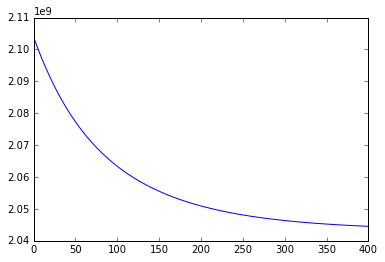

In [431]:
plt.plot(J_history)

In [546]:
X = data[:, 0:2];
X=np.c_[np.ones(m), X];

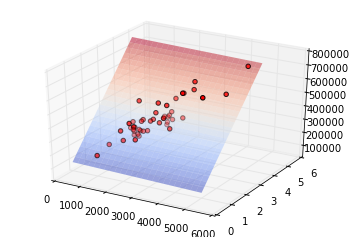

In [594]:
fig = plt.figure()
plt.hold(True)
ax = fig.add_subplot(111, projection='3d')
xx =np.linspace(0,5000,25);
yy =np.linspace(1,5,25);
xx_surf,yy_surf=np.meshgrid(xx,yy);
zz = np.zeros((len(xx),len(yy)));
ax.set_xlim(0, 6000)
ax.set_ylim(0, 6)
ax.set_zlim(30000, 800000)
for i,x_sim in enumerate(xx):
    for j,y_sim in enumerate(yy):
         zz[i,j] = [1,(x_sim-mu[0])/sigma[0],(y_sim-mu[1])/sigma[1]]*theta;
ax.plot_surface(xx_surf, yy_surf, zz, rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=0, antialiased=True,alpha=0.5); 
ax.scatter(X[:,0:1], X[:,1:2], y, c='r', marker='o')



In [606]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]; # 0:2 not include 2
y = data[:, 2];
m = np.size(y);
X=np.c_[np.ones(m), X];

In [607]:
theta = np.zeros((np.shape(X)[1], 1));


In [643]:
theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.transpose(X)),y);

In [624]:
print('Theta computed from the normal equations: \n');
for i in xrange(len(theta)): print 'theta=%.0f ' %(theta[i])

Theta computed from the normal equations: 

theta=89598 
theta=139 
theta=-8738 


In [646]:
x_targe=[1, 1650, 3];
theta
price = x_targe*theta;
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n $%f\n' %price);

TypeError: float argument required, not numpy.ndarray

In [647]:
price


array([ 89597.90954479,    139.21067402,  -8738.01911287])

In [627]:
x_targe=[1650,3];
x_targe=np.insert((x_targe-mu)/sigma,0,1)

In [663]:
theta=np.reshape(theta,(len(theta),1))
np.matrix(theta)

matrix([[ 89597.90954479],
        [   139.21067402],
        [ -8738.01911287]])

In [669]:
x_targe1=np.matrix([1, 1650, 3])
x_targe1*theta

matrix([[ 293081.46433513]])

In [671]:
x_targe1=[1, 1650, 3]
np.dot(x_targe1,theta)

array([ 293081.46433513])

Running Gradient Descent ...

32.0727338775
Theta found by gradient descent: 
-3.629812 1.166314 



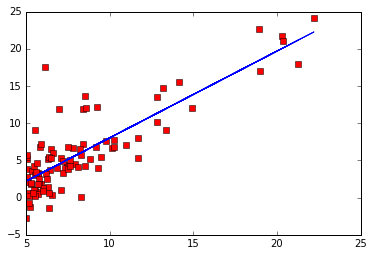

In [684]:
fname='ex1data1.txt';
#dtype = np.dtype([('X', 'f8'), ('y', 'f8')])
data = np.loadtxt(fname, delimiter=',')
data=np.asmatrix(data)
y=data[:,1];
m = len(y);

print('Running Gradient Descent ...\n')
X = np.c_[np.ones(m), data[:,0]];
theta = np.zeros((2,1))
J = computeCost(X, y, theta)
print(J)

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;
theta, J = gradientDescent(X, y, theta, alpha, iterations);

#print theta to screen
print('Theta found by gradient descent: ');
print('%f %f \n' % (theta[0], theta[1]));

XX = data[:, 0];
y = data[:, 1];

plt.plot(XX, y,'rs');
plt.axis([5, 25, -5, 25]);
plt.hold(True);
plt.plot(XX, X*theta, '-')
plt.show()

In [678]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = X.shape[0];
    J_history = np.zeros(iterations);
    for iter in range(0,iterations-1):
        H=X*theta;
        theta0_temp = theta[0,0]-alpha*np.sum(H-y)/m;
        theta1_temp = theta[1,0]-alpha*np.sum(np.multiply((H-y),X[:,1]))/m;
        theta = np.transpose(np.asmatrix([theta0_temp, theta1_temp]))
        #theta = [theta0_temp, theta1_temp];
        J_history[iter] = computeCost(X, y, theta);
    return theta,J_history

In [685]:
import seaborn as sns
sns.set(style="ticks")

In [686]:
XX = data[:, 0];
y = data[:, 1];


In [644]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

array([ 89597.90954479,    139.21067402,  -8738.01911287])

In [699]:
x_targe1=[1, 1650, 3]

In [703]:
np.matrix(x_targe1).T

matrix([[   1],
        [1650],
        [   3]])